## Building Regression Models

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
32246,2020-05-24,1869,Spanish Primera Division,Villarreal,Eibar,73.84,73.46,0.4872,0.2588,0.2540,1.64,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32247,2020-05-24,1871,Spanish Segunda Division,Las Palmas,Extremadura UD,36.80,31.54,0.4904,0.2091,0.3004,1.38,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32248,2020-05-24,1871,Spanish Segunda Division,Numancia,Tenerife,29.52,30.98,0.4367,0.2657,0.2977,1.36,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32249,2020-05-24,1871,Spanish Segunda Division,Elche,Real Oviedo,32.18,30.04,0.4768,0.2473,0.2759,1.56,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32250,2020-05-24,1871,Spanish Segunda Division,Real Zaragoza,SD Ponferradina,37.74,29.92,0.5405,0.2037,0.2558,1.76,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


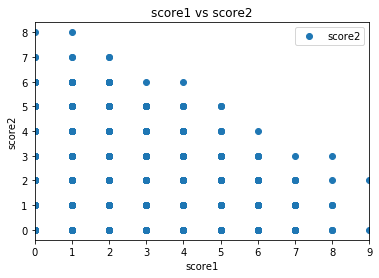

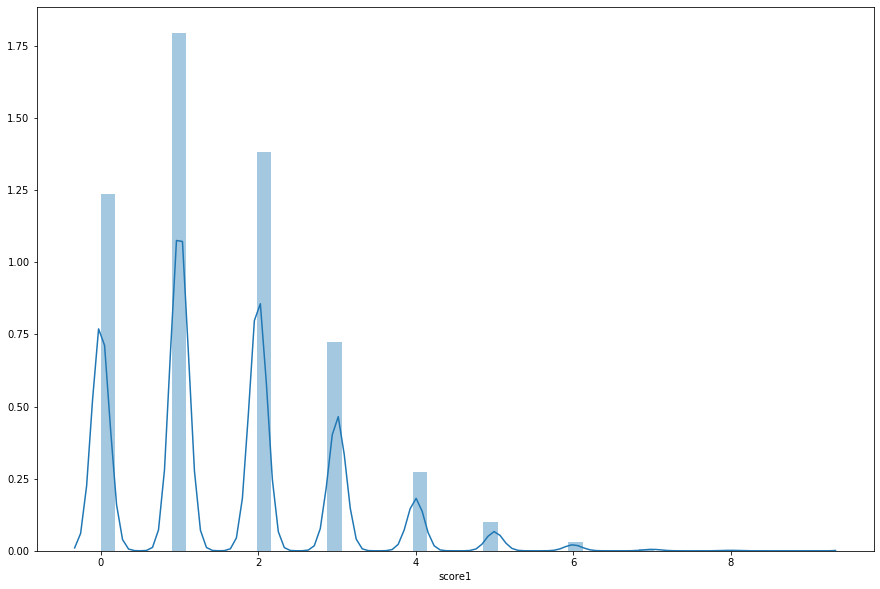

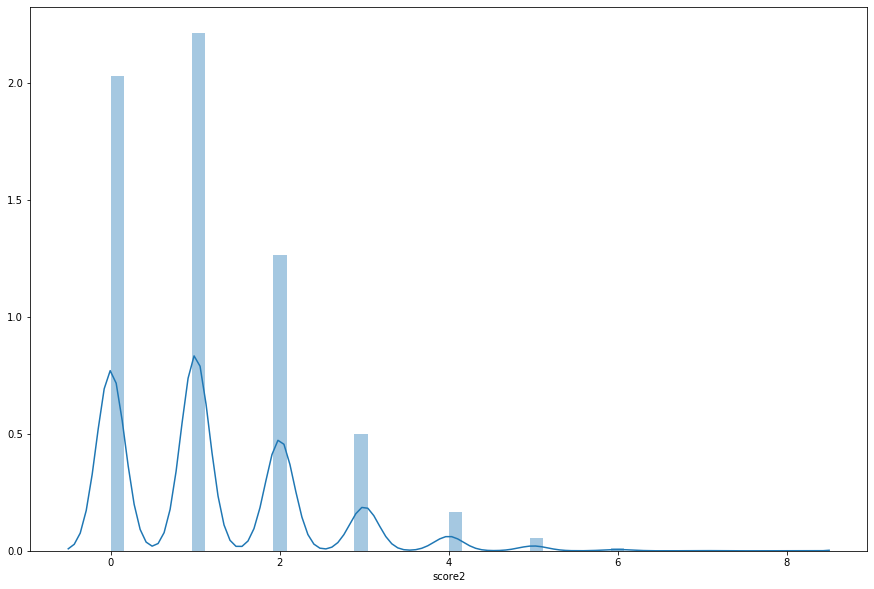

In [1]:
%run data_exploration1.ipynb ;

### Building the linear regression model for score1

In [2]:
X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']].values
y1 = spi_matches2['score1'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [4]:
regressor = LinearRegression()  
mod = regressor.fit(X_train, y_train)

In [5]:
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df

In [6]:
y_pred = regressor.predict(X_test)

In [7]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(100)
df1.head()

,Actual,Predicted
0,0.0,0.974814
1,2.0,1.695028
2,1.0,1.214185
3,1.0,1.764012
4,0.0,2.019510


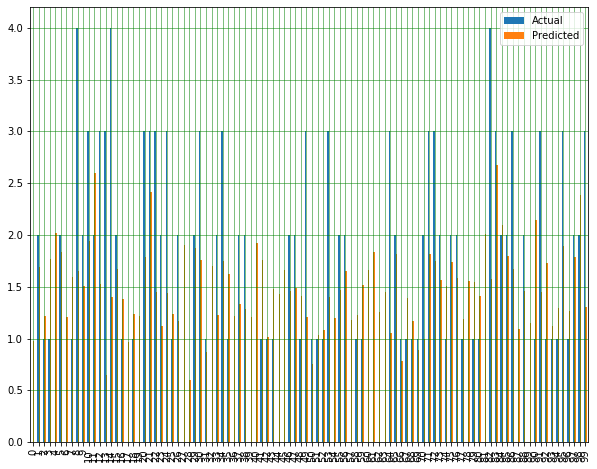

In [8]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.938770905870028
Mean Squared Error: 1.396395594648994
Root Mean Squared Error: 1.1816918357376403


### The metrics used for the regression are as follows:
1. Mean Asbolute error which is the average of all residuals.
2. Mean Squared error which is the squraing the residuals and then taking their average.
3. root mean squared error which is the square root of the Mean squared error.

### Building the linear regression model for score2

In [10]:
X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','off_y']].values
y2 = spi_matches2['score2'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(100)
df1.head()

,Actual,Predicted
0,1.0,1.777130
1,1.0,1.020490
2,0.0,0.954708
3,1.0,0.776290
4,1.0,1.184524


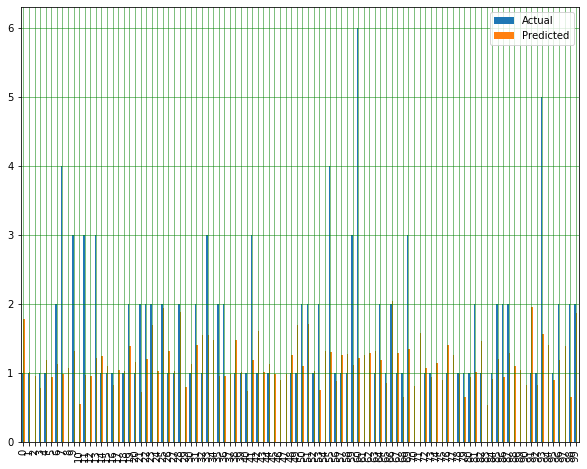

In [15]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8587917051021944
Mean Squared Error: 1.2138690561699619
Root Mean Squared Error: 1.1017572582787742


## Random Forest Model 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeClassifier()

In [18]:
#X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','xg1','xg2','nsxg1','nsxg2','off_x','off_y']]
X1 = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']]
X2 = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']]
y1 = spi_matches2['score1']
y2 = spi_matches2['score2']
y1=y1.astype(str)
y2=y2.astype(str)

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [20]:
rf = RandomForestClassifier()

In [21]:
rf.fit(X1_train, y1_train)
rf.fit(X2_train, y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rf.score(X1_train, y1_train)
rf.score(X2_train, y2_train)

0.9829951831849365

In [23]:
print(rf.score(X1_test,y2_test))
print(rf.score(X2_test, y2_test))

0.2841506129597198
0.35004378283712784


* The accuracy for the random forest classifier was around 32.6%.